# $\delta$ - funkcia

Delta funkcia $\delta(t)$ je zovšeobecnenou funkciou, ktorú zaviedol fyzik Paul Dirac. Vo fyzike reprezentuje hmotný bod, bodový náboj s konečnou hodnotou sústredené v jednom bode alebo impulz sily s definovanou hodnotou v krátkom časovom okamžiku.



## Matematická reprezentácia 

Pre približnú reprezentáciu $\delta(t)$ funkcie môžeme použiť limitné definície, napríklad

\begin{equation}
\delta(t) = \lim_{n \rightarrow \infty} \frac{sin(nt)} {nt}
\end{equation}


\begin{equation}
\delta(t) = \lim_{n \rightarrow \infty} \sqrt{\frac {n}{2 \pi}} \, exp \left(-\frac{n t^2}{2} \right)
\end{equation}

$\delta$-funkciu môžeme definovať aj pomocou jej spektrálnej hustoty, ktorá je konštantná pre celý rozsah frekvenčného spektra. Pomocou Fourierovej transformácie získame spektrálnu hustotu $\delta(t)$ funkcie

\begin{equation}
S_{\delta}(\omega) =  \int_{-\infty}^{\infty} e^{-j \omega t} \, \delta(t) \, dt = \left [ e^{-j \omega t} \right ] _{t=0} = 1
\end{equation}

táto je konštantná v celom rozsahu frekvencií. Opačne preto vieme získať $\delta$-funkciu súčtom všetkých frekvenčných zložiek spektra, z fyzikálneho hľadiska sa na tento súčet môžeme pozerať ako na interferencia týchto zložiek s interferenčným maximom čase $t=0$.

\begin{equation}
\sigma(t) =  \frac{1}{2 \pi}\int_{-\infty}^{\infty} S_{\delta}(\omega) \, e^{-j \omega t}  \, d(\omega) = \frac{1}{2 \pi}\int_{-\infty}^{\infty} e^{-j \omega t}  \, d(\omega)
\end{equation}

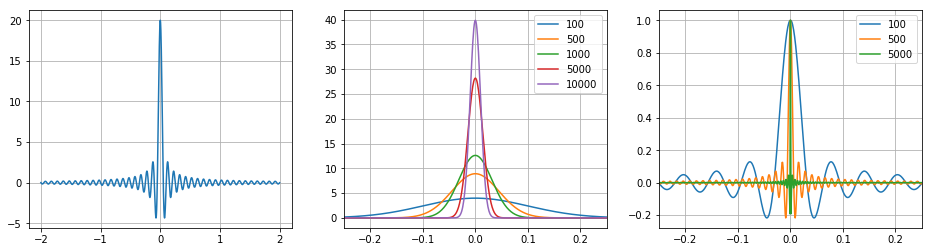

In [1]:
%reset -f  
%matplotlib inline
from scipy import *
import pylab as plt

# Numericka simulacia roznych reprezentacii delta funkcie 
dt = 0.001
t = arange(-2.0, 2.0, dt)

s = zeros(len(t))                # 1. suctom zloziek spektra 
df = .01                         # rozlisenie spektralnych zloziek
for f in  arange(-10, 10, df):   # hranice sumacie 
    s = s + exp(2j*pi*f*t)*df    # sumacia harmonickych zloziek s krokom df 
s=real(s)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(131)            
plt.plot(t, s)             
plt.grid()

plt.subplot(132)                 # 2. limitnym vztahom exp(-x^2)
for n in [100, 500, 1000, 5000, 10000]:
    q = sqrt(n/(2*pi))*exp(-n*t**2/2)
    plt.plot(t, q, label=str(n)) 
plt.legend()
plt.xlim(-0.25, 0.25)
plt.grid()

plt.subplot(133)                 # 3. sin(x)/x
for n in [100, 500, 5000]:
    w = sin(n*t)/(n*t)
    plt.plot(t, w, label=str(n)) 
plt.legend()
plt.xlim(-0.25, 0.25)
plt.grid()
plt.show()

## Integrálne vlastnosti

Integál $\delta(t)$ je má konečnú hodnotu a fundamentálnou vlastnosťou tejto funkcie. Nie všetky približné reprezentácie funkcie túto podmienku spĺňajú. 

\begin{equation}
\int_{-\infty}^{\infty} \delta(t) \, dt = 1
\end{equation}

Je zrejmé, že integrál $\delta$ funkcie je nulový mimo bodu nespojitosti, v bode nespojitosti má funkcia nekonečnú hodnotu, integrál je ale konečný,

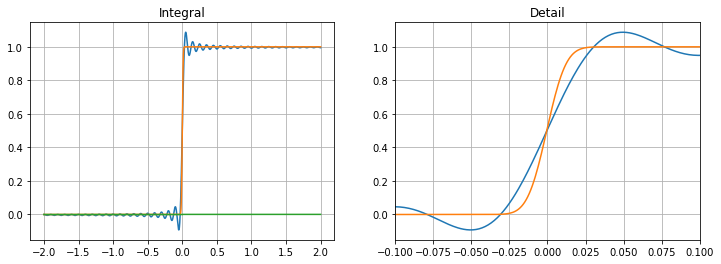

In [2]:
# Integral delta funkcie

r1 = zeros(len(t))
r2 = zeros(len(t))
r3 = zeros(len(t))

for i in range(1,len(t)):                # jednoducha integracia obdlznikom f(dt)*dt
    r1[i] = r1[i-1] + s[i]*dt            # integral spektralnej reprezentacie
    r2[i] = r2[i-1] + q[i]*dt            # integral exponencialnej reprezentacie
    r3[i] = r3[i-1] + w[i]*dt            # integral sin(x)/x nie je rovny 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)            
plt.plot(t, r1)
plt.plot(t, r2)
plt.plot(t, r3)
plt.title('Integral')
plt.grid()

ax = fig.add_subplot(122)
plt.plot(t, r1)
plt.plot(t, r2)
plt.xlim(-0.1,0.1)
plt.title('Detail')
plt.grid()

plt.show()

## Filtračné vlastnosti

Pomocou filtračných vlastností $\delta(t)$ funkcie vieme reprezentovať v matematickom tvare nespojité signály, ako je napr. signál na výstupe vzorkovacieho obvodu.

\begin{equation}
s(t_0) = \int_{-\infty}^{\infty} s(t) \, \delta(t - t_0) \, dt 
\end{equation}

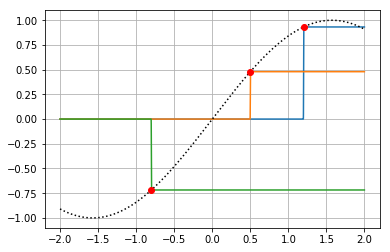

In [3]:
# Priklad vzorkovania harmonickeho signalu 
s = sin(t)                        # vstupny signal
t0 = array([-0.8, 0.5, 1.2])      # casove okamziky vzorkovania

n = 1e6                           # parameter simulovanej delta-funkcie 
for i in t0[::-1]:
    f = sqrt(n/(2*pi))*exp(-n*(t-i)**2/2)

    r = zeros(len(t))
    for i in range(1,len(t)):     # jednoducha integracia
        r[i] = r[i-1] + s[i]*f[i]*dt
    plt.plot(t, r)

plt.plot(t, s, 'k:')
plt.plot(t0, sin(t0), 'ro')
plt.grid()
plt.show()

### Posun $\delta$-funkcie v čase

Spektrálnu hustotu časovo posunutej delta funkcie určime jednoducho s využitím jej filtračných vlastností

\begin{equation}
S_{\delta}(\omega) =  \int_{-\infty}^{\infty} e^{-j \omega t} \, \delta(t - t_0) \, dt = \left [ e^{-j \omega t} e^{j \omega t_0} \right ] _{t=0} = 1 \,  e^{j \omega t_0} 
\end{equation}

Spektrálne zložky $\delta$-funkcie posunutej v čase o hodnotu $t_0$ majú zase amplitúdu rovnú 1, jednotlivé zložky sú ale fázovo posunuté o uhol $\phi = 2 \pi f t_0 = 2 \pi \frac{t_0}{T}$

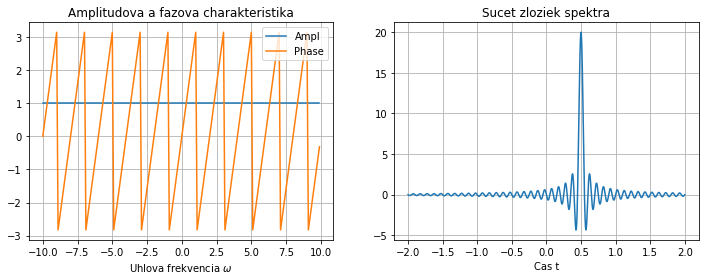

In [4]:
%reset -f  
%matplotlib inline
from scipy import *
import pylab as plt

# Numericka simulacia delta-funkcie posunutej v case 
t = arange(-2.0, 2.0, 0.001)           # casovy interval       
t0 = 0.5                               # posun v case

x = zeros(len(t))                      # sucet spektralnych zloziek    
ampl = []
phase = []

omega=arange(-10, 10, 0.1)             # frekvencne zlozky
for f in omega  :                      # hranice sumacie cez frekvencne zlozky
    w = exp(-2j*pi*f*t)                # frekvencna zlozka
    p = exp(2j*pi*f*t0)                # fazovy uhol
    ampl.append(abs(p))                # amplituda zlozky
    phase.append(angle(p))             # faza zlozky
    x = x + p * w * 0.1                # sumacia harmonickych zloziek s krokom df             
x=real(x)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)            
plt.title('Amplitudova a fazova charakteristika')
plt.plot(omega, ampl, label='Ampl')
plt.plot(omega, phase, label = 'Phase')
plt.grid()
plt.xlabel('Uhlova frekvencia $\omega$')
plt.legend()

ax = fig.add_subplot(122)            
plt.title('Sucet zloziek spektra')
plt.plot(t,x)
plt.grid()
plt.xlabel('Cas t')

plt.show()